In [80]:
# Data (pre-)processing
import os
import pandas as pd
import numpy as np
from fcsy import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10000, centers=[[-1, -1]], random_state=1)
NBM = pd.DataFrame(X, columns=["LAIP1", "LAIP2"])
NBM["label"] = "Normal"
NBM["sample"] = "NBM"

X, y = make_blobs(n_samples=[7500, 2500], centers=[[-1, -1], [3, -1]], random_state=2)
AML1 = pd.DataFrame(X, columns=["LAIP1", "LAIP2"])
AML1["label"] = np.where(y == 1, "Leukemic", "Non-leukemic")
AML1["sample"] = "AML1"

X, y = make_blobs(n_samples=[7500, 100], centers=[[-1, -1], [3, -1]], random_state=3)
AML2 = pd.DataFrame(X, columns=["LAIP1", "LAIP2"])
AML2["label"] = np.where(y == 1, "Leukemic", "Non-leukemic")
AML2["sample"] = "AML2"

X, y = make_blobs(n_samples=[7500, 2500], centers=[[-1, -1], [-1, 3]], random_state=4)
AML3 = pd.DataFrame(X, columns=["LAIP1", "LAIP2"])
AML3["label"] = np.where(y == 1, "Leukemic", "Non-leukemic")
AML3["sample"] = "AML3"

In [255]:
xlims = (-6, 6)
ylims = (-6, 6)

(-6.0, 6.0)

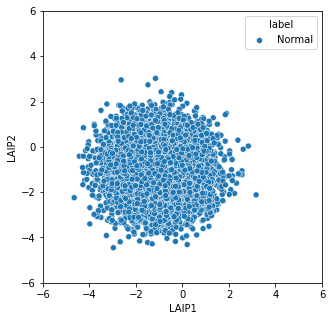

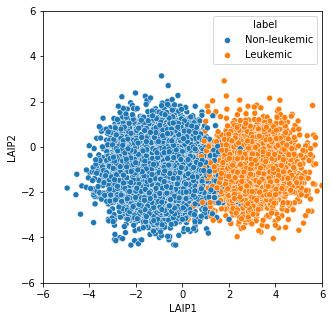

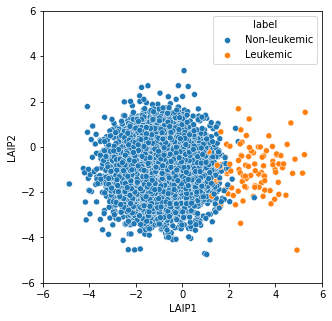

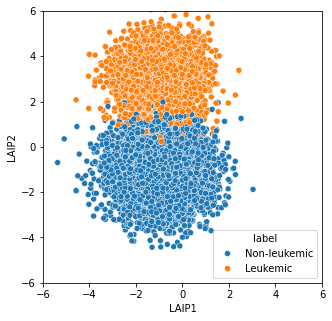

In [256]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=NBM, x="LAIP1", y="LAIP2", hue="label")
ax.set_xlim(xlims)
ax.set_ylim(ylims)

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=AML1, x="LAIP1", y="LAIP2", hue="label", hue_order=["Non-leukemic", "Leukemic"])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=AML2, x="LAIP1", y="LAIP2", hue="label", hue_order=["Non-leukemic", "Leukemic"])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=AML3, x="LAIP1", y="LAIP2", hue="label", hue_order=["Non-leukemic", "Leukemic"])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

# Supervised setup

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import neighbors

df_X = AML1[["LAIP1", "LAIP2"]]

clf = neighbors.KNeighborsClassifier(5, weights='uniform')
clf.fit(df_X, np.where(AML1["label"]=="Leukemic",1,0))

# Step 3: Plot the decision surface
# Create a mesh to plot in
x_min, x_max = df_X["LAIP1"].min() - 3, df_X["LAIP1"].max() + 3
y_min, y_max = df_X["LAIP2"].min() - 3, df_X["LAIP2"].max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Plot decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/home/timmocking/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(-6.0, 6.0)

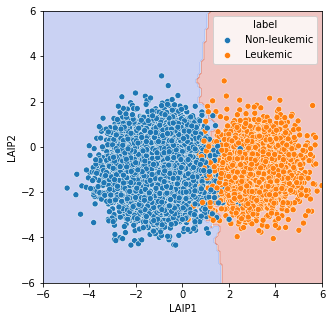

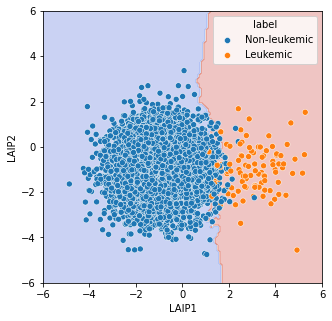

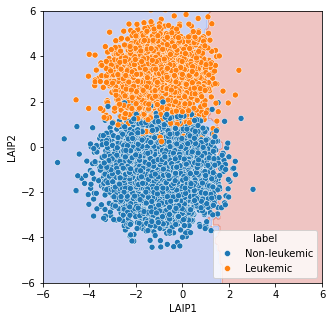

In [258]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(data=AML1, x="LAIP1", y="LAIP2", hue="label", hue_order=["Non-leukemic", "Leukemic"])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

fig, ax = plt.subplots(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(data=AML2,x="LAIP1", y="LAIP2", hue="label", hue_order=["Non-leukemic", "Leukemic"])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

fig, ax = plt.subplots(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(data=AML3,x="LAIP1", y="LAIP2", hue="label", hue_order=["Non-leukemic", "Leukemic"])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

# Cluster-with-normal approach

Cluster NBM + AML1
Cluster NBM + AML2
Cluster NBM + AML3

# Semi-supervised approach

Fit a model on NBM

Plot decision boundary in like supervised approach